In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle

In [2]:
print (cv2.__version__)

3.3.1


In [3]:
source="D:\\data analytics\\S2\\Ml lab\\dataset\\distracted driver\\"

In [4]:
def show_rgb_img(img,ax=plt):
    """Convenience function to display a typical color image"""
    return ax.imshow(cv2.cvtColor(img, cv2.CV_32S))

In [5]:
def getTrainFiles(classIndex):
    trainDir=source+"train\\c"+str(classIndex)
    files=[os.path.join(trainDir, f) for f in os.listdir(trainDir)]
    return files

D:\data analytics\S2\Ml lab\dataset\distracted driver\train\c0\img_100026.jpg
D:\data analytics\S2\Ml lab\dataset\distracted driver\train\c0\img_10003.jpg
D:\data analytics\S2\Ml lab\dataset\distracted driver\train\c1\img_100021.jpg


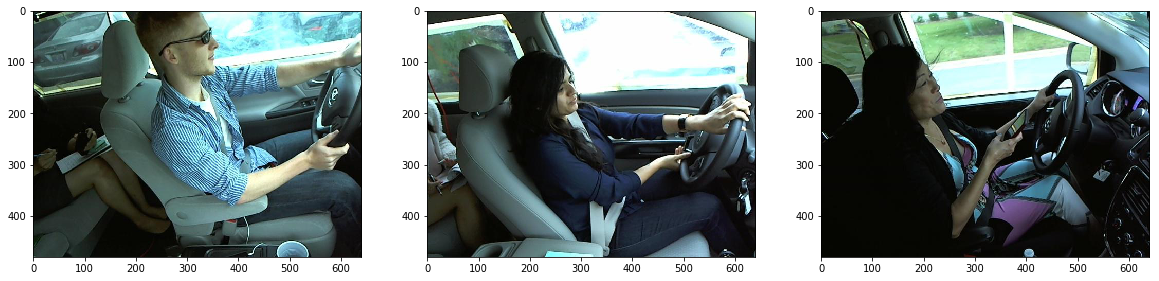

In [6]:
c0Files= getTrainFiles(0)
c1Files=getTrainFiles(1)

c01=cv2.imread(c0Files[0])
c02=cv2.imread(c0Files[1])
c11=cv2.imread(c1Files[0])
fig,axes=plt.subplots(1,3,figsize=(20, 20))
show_rgb_img(c01,axes[0]);
show_rgb_img(c02,axes[1]);
show_rgb_img(c11,axes[2]);
print(c0Files[0])
print(c0Files[1])
print(c1Files[0])

In [7]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

In [8]:
c01_gray=to_gray(c01)
c11_gray=to_gray(c11)
c02_gray=to_gray(c02)

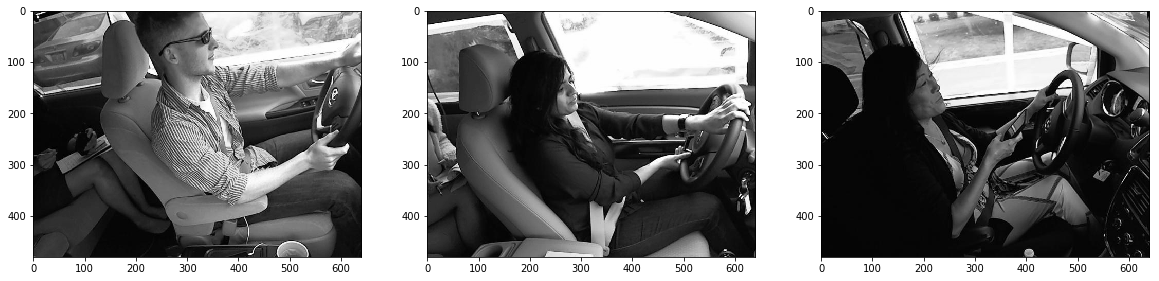

In [9]:
fig,axes=plt.subplots(1,3,figsize=(20, 20))
axes[0].imshow(c01_gray,cmap='gray')
axes[1].imshow(c02_gray,cmap='gray')
axes[2].imshow(c11_gray,cmap='gray')

In [10]:
sift = cv2.xfeatures2d.SIFT_create()
def gen_sift_features(img,gray=True):
    if(not gray):
        img =  to_gray(img)

    # kp is the keypoints
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    kp, desc = sift.detectAndCompute(img, None)
    return kp, desc

def show_sift_features(gray_img, kp,axes=plt):
    return axes.imshow(cv2.drawKeypoints(gray_img, kp,None))

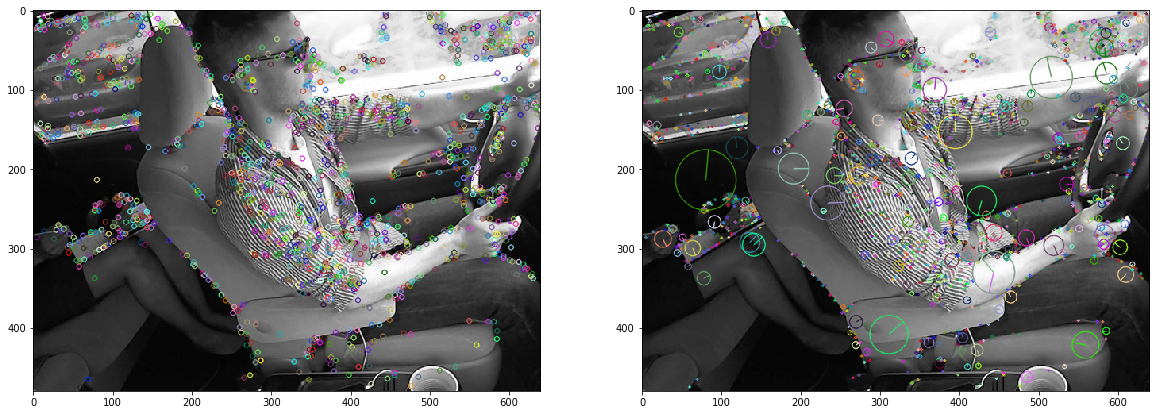

In [11]:
c01kp,c01desc=gen_sift_features(c01_gray)
c02kp,c02desc=gen_sift_features(c02_gray)
c11kp,c11desc=gen_sift_features(c11_gray)
fig,axes=plt.subplots(1,2,figsize=(20, 20))
show_sift_features(c01_gray,c01kp,axes[0])
axes[1].imshow(cv2.drawKeypoints(c01_gray,c01kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))

In [19]:
index = []
for point in c01kp:
    temp = (point.pt, point.size, point.angle, point.response, point.octave, point.class_id)
    index.append(temp)

# Dump the keypoints
f = open("keypoints.txt", "w")
f.write(str(pickle.dumps(index)))
f.close()

In [ ]:
print("keypt len ",len(c01kp))
print("desc len ",len(c01desc))

In [ ]:
print(c01kp[0].angle)

In [ ]:
print(c01desc[0])

In [ ]:
d=pd.DataFrame(columns=['imgid','class','vbow'])

In [ ]:
classCount=3
totalFileCount=0
for i in range(0,classCount):
    classfiles=getTrainFiles(i)
    totalFileCount+=len(classfiles)
fileCount=100
index=0
kpList = [] 
descList= []
for i in range(0,classCount):
    classfiles=getTrainFiles(i)
#     for j in range(0,fileCount):
    for j in range(0,len(classfiles)):
        imfile=classfiles[j]
        fileName=imfile.split("\\")[-1]
        img=cv2.imread(imfile)
        kp, desc =  gen_sift_features(img,False)
#         for k in range(0,len(kp)):
#             kpList.append(kp[k])
#             descList.append(np.array(desc[k]))
#         d.loc[len(d)]=[fileName,i,None]
        if(index%100==0):
            print(index)
        index+=1

    

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [ ]:
print(d)